In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colormaps as cm
%matplotlib inline

In [3]:
ds = xr.open_dataset('./../Datasets/P_Per/pper_full.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:             (time: 16436, x: 93, y: 65)
Coordinates:
  * time                (time) datetime64[ns] 1979-01-01T12:00:00 ... 2023-12...
  * x                   (x) float64 0.0 1.0 2.0 3.0 4.0 ... 89.0 90.0 91.0 92.0
  * y                   (y) float64 0.0 1.0 2.0 3.0 4.0 ... 61.0 62.0 63.0 64.0
Data variables:
    lat                 (y, x) float64 ...
    lon                 (y, x) float64 ...
    p_perfect_totalsvr  (time, y, x) float64 ...
Attributes:
    title:         Practically Perfect All Svr Hindcasts
    sigma:         1.5
    grid:          80-km NCEP 211
    author:        Dr. Victor Gensini
    author_email:  vgensini@niu.edu
    citation:      https://doi.org/10.1175/BAMS-D-19-0321.1

In [4]:
time_sel = '2013-05-31'

ds_sel = ds.sel(time= time_sel,  method= 'nearest')

vmin= 5 
vmax= 100 

cmap = cm['gist_ncar_r'].copy() 
cmap.set_bad(color='gray') 

mask = ds_sel.where(ds_sel.p_perfect_totalsvr >= 5)


In [5]:
mask

<xarray.Dataset>
Dimensions:             (y: 65, x: 93)
Coordinates:
    time                datetime64[ns] 2013-05-31T12:00:00
  * x                   (x) float64 0.0 1.0 2.0 3.0 4.0 ... 89.0 90.0 91.0 92.0
  * y                   (y) float64 0.0 1.0 2.0 3.0 4.0 ... 61.0 62.0 63.0 64.0
Data variables:
    lat                 (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    lon                 (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    p_perfect_totalsvr  (y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    title:         Practically Perfect All Svr Hindcasts
    sigma:         1.5
    grid:          80-km NCEP 211
    author:        Dr. Victor Gensini
    author_email:  vgensini@niu.edu
    citation:      https://doi.org/10.1175/BAMS-D-19-0321.1

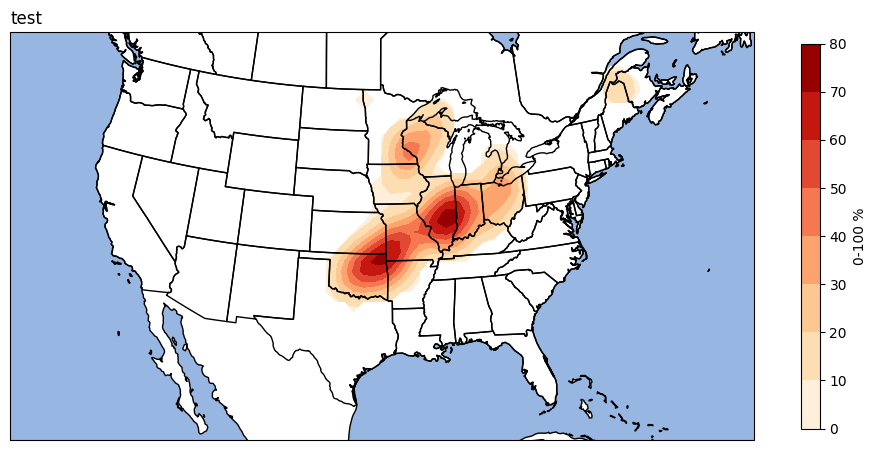

In [6]:
fig= plt.figure(figsize= (12, 10))
ax = plt.subplot(1, 1, 1, projection= ccrs.AlbersEqualArea(central_longitude= (-125-65) / 2))
# ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

ax.set_extent([-125, -65, 20, 50])
plt.title('test', loc= 'left')


cm = ax.contourf(mask.lon, mask.lat, mask.p_perfect_totalsvr, cmap= 'OrRd', transform= ccrs.PlateCarree())
cb = plt.colorbar(cm, shrink= 0.5)
cb.set_label(ds_sel.p_perfect_totalsvr.attrs.get('units'))

In [7]:
ticks = np.arange(0, 110, 10)
def make_image():
    time_sel = input('date:')

    ds_sel = ds.sel(time= time_sel, method= 'nearest')
    mask = ds_sel.where(ds_sel.p_perfect_totalsvr >= 5)
    
    
    fig= plt.figure(figsize= (12, 10))
    ax = plt.subplot(1, 1, 1, projection= ccrs.AlbersEqualArea(central_longitude= (-122-67) / 2))
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.set_extent([-122, -67, 20, 50])
    
    plt.title('test', loc= 'left')


    cm = ax.contourf(mask.lon, mask.lat, mask.p_perfect_totalsvr, cmap= cmap, vmin= vmin, vmax= vmax, transform= ccrs.PlateCarree())
    cb = plt.colorbar(cm, shrink= 0.5, ticks= ticks)
    cb.set_label(ds_sel.p_perfect_totalsvr.attrs.get('units'))

In [8]:
if __name__ == '__main__':
    make_image()

date: 2020-05-29


Error in callback <function _draw_all_if_interactive at 0x7fdc1c52cf70> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x7fdc14bbe040> (for post_execute):



KeyboardInterrupt



In [8]:
ds_tor = xr.open_dataset('./../Datasets/P_Per/pper_tor_1979_2023.nc')
ds_wind = xr.open_dataset('./../Datasets/P_Per/pper_wind_1979_2023.nc')
ds_hail = xr.open_dataset('./../Datasets/P_Per/pper_hail_1979_2023.nc')

ds_tor_sig = xr.open_dataset('./../Datasets/P_Per/pper_sig_tor_1979_2023.nc')
ds_wind_sig = xr.open_dataset('./../Datasets/P_Per/pper_sig_wind_1979_2023.nc')
ds_hail_sig = xr.open_dataset('./../Datasets/P_Per/pper_sig_hail_1979_2023.nc')

ds_tor_sig.p_perfect_sig_tor.min()

<xarray.DataArray 'p_perfect_sig_tor' ()>
array(0.)

In [4]:
time_sel = '2013-05-31'

ds_tor_sel = ds_tor.sel(time= time_sel, method= 'nearest')
ds_wind_sel = ds_wind.sel(time= time_sel, method= 'nearest')
ds_hail_sel = ds_hail.sel(time= time_sel, method= 'nearest')

ds_tor_sig_sel = ds_tor_sig.sel(time= time_sel, method= 'nearest')
ds_wind_sig_sel = ds_wind_sig.sel(time= time_sel, method= 'nearest')
ds_hail_sig_sel = ds_hail_sig.sel(time= time_sel, method= 'nearest')


ds_tor_mask = ds_tor_sel.where(ds_tor_sel.p_perfect_tor >= 1)
ds_wind_mask = ds_wind_sel.where(ds_wind_sel.p_perfect_wind >= 1)
ds_hail_mask = ds_hail_sel.where(ds_hail_sel.p_perfect_hail >= 1)

ds_tor_sig_mask = ds_tor_sig_sel.where(ds_tor_sig_sel.p_perfect_sig_tor >= 1)
ds_wind_sig_mask = ds_wind_sig_sel.where(ds_wind_sig_sel.p_perfect_sig_wind >= 1)
ds_hail_sig_mask = ds_hail_sig_sel.where(ds_hail_sig_sel.p_perfect_sig_hail >= 1)

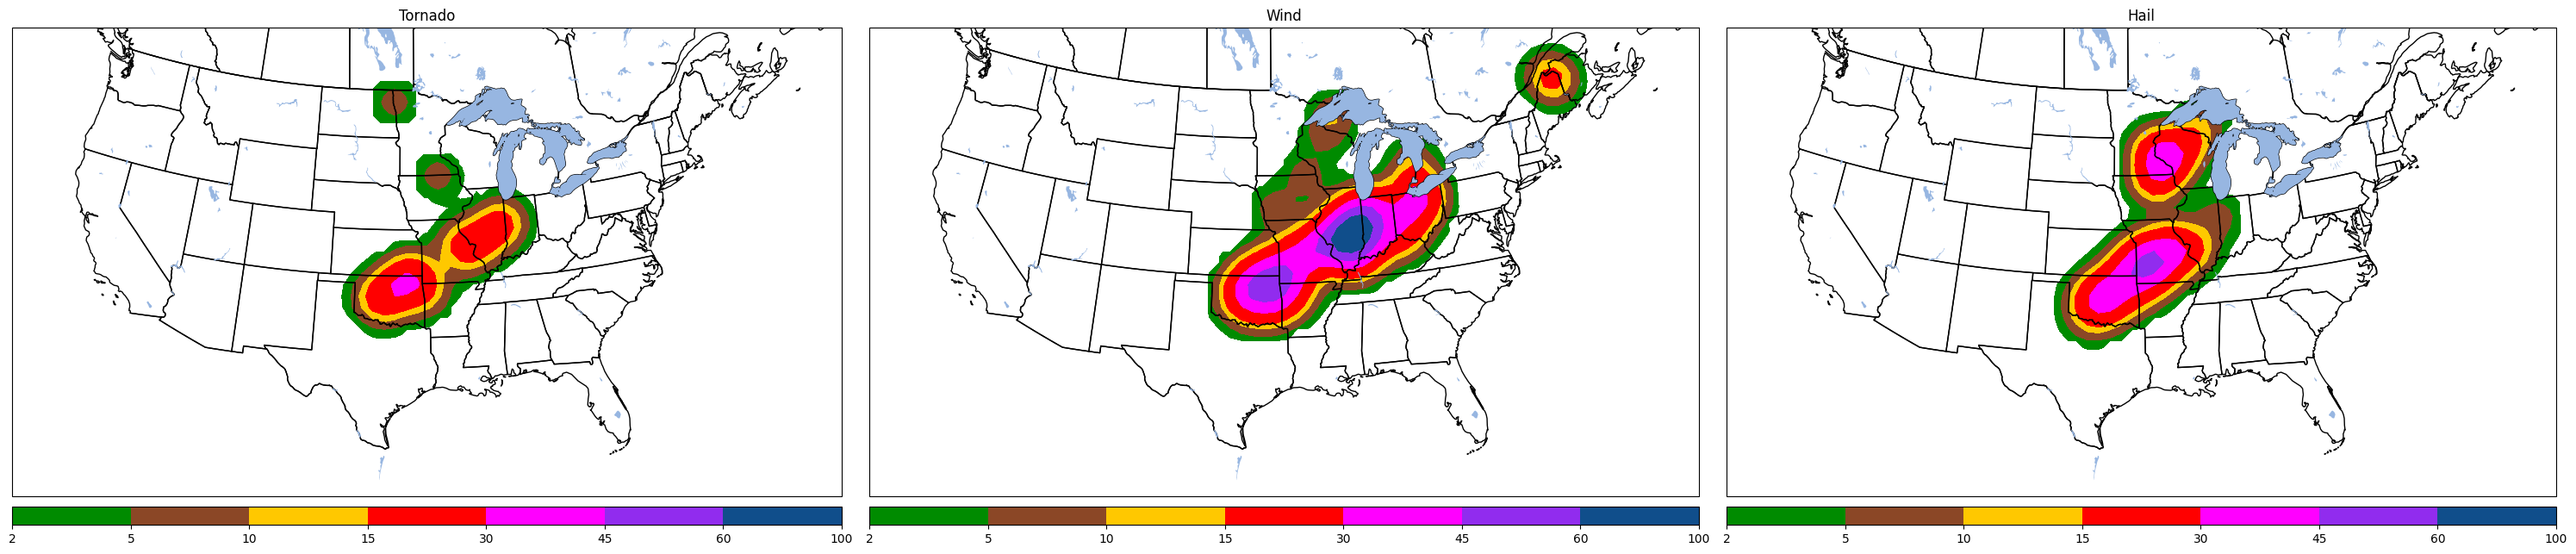

In [7]:
colors = ['#008b00','#8b4726','#ffc800', '#ff0000', '#ff00ff', '#912cee', '#104e8b']
levels = [2, 5, 10, 15, 30, 45, 60, 100]


plt.rcParams['figure.figsize'] = 30, 8
ax1 = plt.subplot(1, 3, 1, projection= ccrs.LambertConformal())
ax2 = plt.subplot(1, 3, 2, projection= ccrs.LambertConformal())
ax3 = plt.subplot(1, 3, 3, projection= ccrs.LambertConformal())



ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.LAKES)
ax1.set_extent([-122, -67, 20, 50])

ax2.add_feature(cfeature.BORDERS)
ax2.add_feature(cfeature.STATES)
ax2.add_feature(cfeature.LAKES)
ax2.set_extent([-122, -67, 20, 50])

ax3.add_feature(cfeature.BORDERS)
ax3.add_feature(cfeature.STATES)
ax3.add_feature(cfeature.LAKES)
ax3.set_extent([-122, -67, 20, 50])

ax1.set_title('Tornado')
ax2.set_title('Wind')
ax3.set_title('Hail')

cm_tor = ax1.contourf(ds_tor_mask.lon, ds_tor_mask.lat, ds_tor_mask.p_perfect_tor, colors= colors, levels= levels, transform= ccrs.PlateCarree())
cm_wind = ax2.contourf(ds_wind_mask.lon, ds_wind_mask.lat, ds_wind_mask.p_perfect_wind, colors= colors, levels= levels, transform= ccrs.PlateCarree())
cm_hail = ax3.contourf(ds_hail_mask.lon, ds_hail_mask.lat, ds_hail_mask.p_perfect_hail, colors= colors, levels= levels, transform= ccrs.PlateCarree())

cb1 = plt.colorbar(cm_tor, orientation= 'horizontal', ax= ax1, pad= 0.015, aspect= 45)
cb2 = plt.colorbar(cm_wind, orientation= 'horizontal', ax= ax2, pad= 0.015, aspect= 45)
cb3 = plt.colorbar(cm_hail, orientation= 'horizontal', ax= ax3, pad= 0.015, aspect= 45)

# plt.tight_layout()
plt.tight_layout()

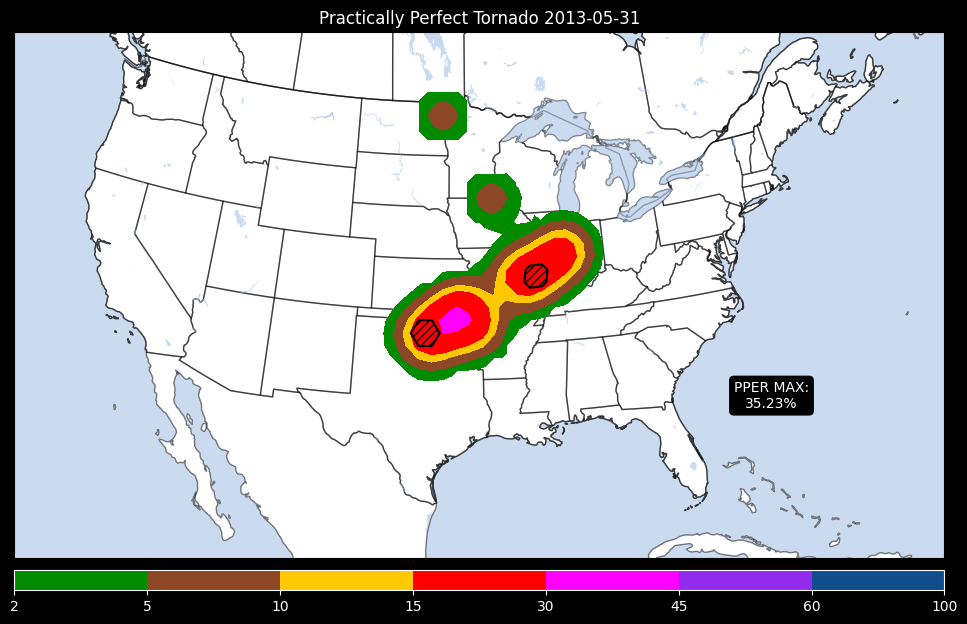

In [94]:
#just tor:

fig= plt.figure(facecolor= 'black', figsize= (12, 10))
ax = plt.subplot(1, 1, 1, projection= ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE, alpha= 0.5)
ax.add_feature(cfeature.BORDERS, alpha= 0.5)
ax.add_feature(cfeature.STATES, alpha= 0.5)
ax.add_feature(cfeature.LAKES, alpha= 0.5)
ax.add_feature(cfeature.OCEAN, alpha= 0.5)

ax.set_extent([-122, -67, 20, 50])


cf= ax.contourf(ds_tor_mask.lon, ds_tor_mask.lat, ds_tor_mask.p_perfect_tor, colors= colors, levels= levels, zorder= 11, transform= ccrs.PlateCarree())
ax.contour(ds_tor_sig_mask.lon, ds_tor_sig_mask.lat, ds_tor_sig_mask.p_perfect_sig_tor, levels= [10, 100], colors= 'black', zorder= 11, transform= ccrs.PlateCarree())
ax.contourf(ds_tor_sig_mask.lon, ds_tor_sig_mask.lat, ds_tor_sig_mask.p_perfect_sig_tor, levels= [10, 100], colors= 'none', zorder= 11, hatches= ['////'], transform= ccrs.PlateCarree())

ax.set_title(f'Practically Perfect Tornado {time_sel}', c= 'white')
plt.annotate(f'PPER MAX:\n{ds_tor_mask.p_perfect_tor.max().values.round(2)}%', va= 'center', ha= 'center', xy= (-75, 30), color= 'white', bbox= dict(boxstyle= 'round', fc= 'k'), transform= ccrs.PlateCarree())

cb= plt.colorbar(cf, orientation= 'horizontal', aspect = 45, pad = 0.015)
cb.ax.xaxis.set_tick_params(color= 'white', labelcolor= 'white')
cb.outline.set_edgecolor('white')